In [ ]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
import os
eeg_directory = './'
def load_and_preprocess_data(subject_file):
    # Load the EEG recording
    subject_data = pd.read_csv(subject_file)
    scaler = StandardScaler()
    subject_normalized = scaler.fit_transform(subject_data)
    return subject_normalized
eeg_data_list = []
for i in range(1, 101):
    subject_file = os.path.join(eeg_directory, f'Subject_{i}.csv')
    subject_data_normalized = load_and_preprocess_data(subject_file)
    eeg_data_list.append(subject_data_normalized)
# Ensure all arrays in eeg_data_list have the same shape
min_length = min([arr.shape[0] for arr in eeg_data_list])
eeg_data_list_equal = [arr[:min_length, :] for arr in eeg_data_list]
eeg_data = np.array(eeg_data_list_equal)
print(eeg_data)


[[[-2.64946696e-01 -3.70681964e-01 -6.46577775e-01 ... -1.01961503e+00
    1.09091738e-01 -3.12323682e-01]
  [-3.46809447e-01 -3.45012249e-01 -7.58439157e-01 ... -1.19661438e+00
    9.81392368e-02 -4.13206289e-01]
  [-2.64946696e-01 -3.50146972e-01 -5.81328305e-01 ... -1.21835197e+00
    7.80590682e-02 -4.62870299e-01]
  ...
  [-2.98320974e+00 -1.11717051e+00 -2.80442639e+00 ... -2.07230352e+00
   -2.96103615e+00 -2.70242046e+00]
  [-3.11964633e+00 -1.24449449e+00 -3.18191857e+00 ... -2.20583950e+00
   -2.87981174e+00 -2.78933544e+00]
  [-3.01679426e+00 -1.12949111e+00 -3.24716808e+00 ... -2.20583950e+00
   -2.72831198e+00 -2.72259461e+00]]

 [[-6.05919402e-01 -5.78305568e-02 -5.91797623e-01 ... -2.30859939e-01
   -4.86045427e-01 -5.49089337e-02]
  [-4.90220834e-01 -9.99406210e-03 -5.28191839e-01 ... -3.48960789e-01
   -5.25626675e-01 -8.48339604e-02]
  [-4.63782659e-01 -2.03946748e-02 -4.93966916e-01 ... -2.91696058e-01
   -4.55889307e-01 -3.54622226e-02]
  ...
  [-1.36528208e-01 -1.9

In [ ]:
eeg_data

array([[[-2.64946696e-01, -3.70681964e-01, -6.46577775e-01, ...,
         -1.01961503e+00,  1.09091738e-01, -3.12323682e-01],
        [-3.46809447e-01, -3.45012249e-01, -7.58439157e-01, ...,
         -1.19661438e+00,  9.81392368e-02, -4.13206289e-01],
        [-2.64946696e-01, -3.50146972e-01, -5.81328305e-01, ...,
         -1.21835197e+00,  7.80590682e-02, -4.62870299e-01],
        ...,
        [-2.98320974e+00, -1.11717051e+00, -2.80442639e+00, ...,
         -2.07230352e+00, -2.96103615e+00, -2.70242046e+00],
        [-3.11964633e+00, -1.24449449e+00, -3.18191857e+00, ...,
         -2.20583950e+00, -2.87981174e+00, -2.78933544e+00],
        [-3.01679426e+00, -1.12949111e+00, -3.24716808e+00, ...,
         -2.20583950e+00, -2.72831198e+00, -2.72259461e+00]],

       [[-6.05919402e-01, -5.78305568e-02, -5.91797623e-01, ...,
         -2.30859939e-01, -4.86045427e-01, -5.49089337e-02],
        [-4.90220834e-01, -9.99406210e-03, -5.28191839e-01, ...,
         -3.48960789e-01, -5.25626675e

In [ ]:
project_datasets_path = './final_processed_100.csv'
project_datasets = pd.read_csv(project_datasets_path)
labels = project_datasets['lables'].values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
sequence_length = 100

In [ ]:
X, y = [], []
for subject_data, label in zip(eeg_data, labels_encoded):
    for i in range(len(subject_data) - sequence_length):
        X.append(subject_data[i:i+sequence_length])
        y.append(label)
X = np.array(X)
y = np.array(y)
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(LSTM(100, input_shape=(sequence_length, X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

/home/user36/.local/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
134530/134530 ━━━━━━━━━━━━━━━━━━━━ 25714s 191ms/step - accuracy: 0.7367 - loss: 0.5854 - val_accuracy: 0.9572 - val_loss: 0.1169
Epoch 2/3
134530/134530 ━━━━━━━━━━━━━━━━━━━━ 24584s 183ms/step - accuracy: 0.9602 - loss: 0.1100 - val_accuracy: 0.9766 - val_loss: 0.0651
Epoch 3/3
134530/134530 ━━━━━━━━━━━━━━━━━━━━ 24602s 183ms/step - accuracy: 0.9620 - loss: 0.1021 - val_accuracy: 0.8032 - val_loss: 0.4687


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test_classes, y_pred_classes))

42041/42041 ━━━━━━━━━━━━━━━━━━━━ 2866s 68ms/step - accuracy: 0.8020 - loss: 0.4710
Test Accuracy: 80.22%
42041/42041 ━━━━━━━━━━━━━━━━━━━━ 2817s 67ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.84    699719
           1       0.83      0.72      0.77    484346
           2       0.75      0.68      0.71    161235

    accuracy                           0.80   1345300
   macro avg       0.79      0.76      0.78   1345300
weighted avg       0.80      0.80      0.80   1345300



In [ ]:
model.save('eeg_classification_model.h5')

In [ ]:
import joblib
joblib.dump(model, 'eeg_model.joblib')

['eeg_model.joblib']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

In [ ]:
report = classification_report(y_test_classes, y_pred_classes, output_dict=True)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

In [ ]:
report_text = classification_report(y_test_classes, y_pred_classes)
with open('classification_report.txt', 'w') as f:
    f.write(report_text)

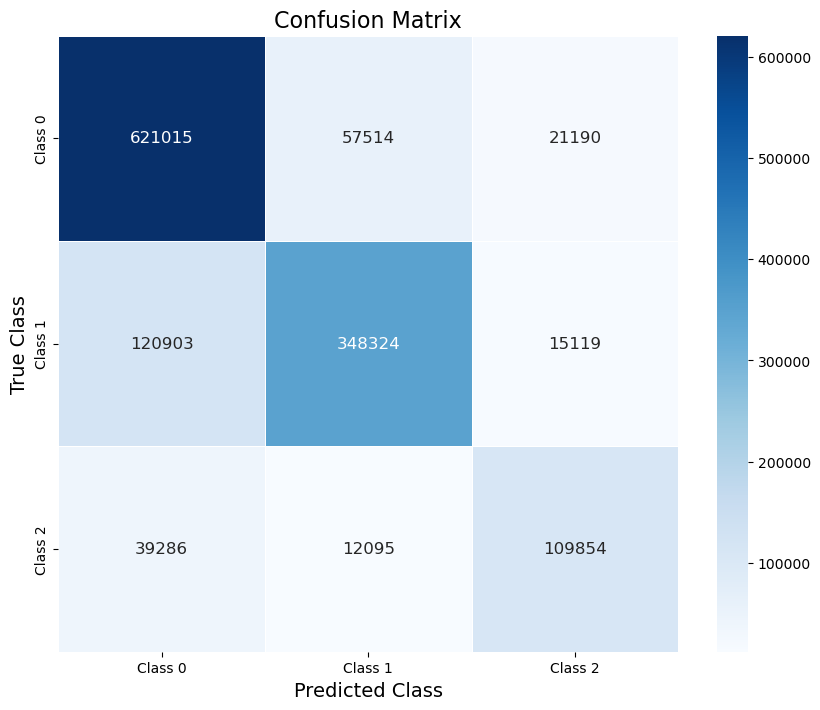

In [ ]:
# Create a DataFrame for the confusion matrix to use with seaborn
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=[f'Class {i}' for i in range(conf_matrix.shape[0])],
                              columns=[f'Class {i}' for i in range(conf_matrix.shape[1])])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=True,
            annot_kws={"size": 12}, linewidths=.5)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('True Class', fontsize=14)
plt.savefig('confusion_matrix.png', bbox_inches='tight')
plt.show()

In [ ]:
from io import StringIO
report_df = pd.DataFrame(report).transpose()
report_str = classification_report(y_test_classes, y_pred_classes)
report_strio = StringIO(report_str)
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust size as needed
ax.text(0.1, 0.95, report_str, {'fontsize': 12}, ha='left', va='top', family='monospace')
ax.axis('off')
plt.savefig('classification_report.png', bbox_inches='tight', dpi=300)
plt.close()